# Macchina a Catodo Caldo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

d = 0.004 #m

## Caratteristica VI

In [2]:
data1 = pd.read_excel("py_catodo_caldo.xlsx", sheet_name = "presa 3")
data1['V_alim']=data1['V_alim']
data1['I_plasma']=data1['I_plasma']

[  1.88804229 -31.74177411]


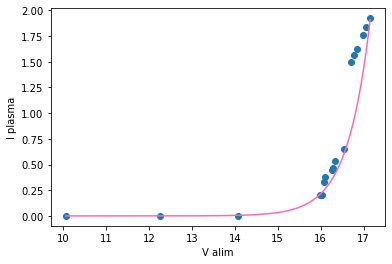

In [3]:
plt.scatter((data1['V_alim']), (data1['I_plasma']))
plt.xlabel('V alim')
plt.ylabel('I plasma')

w = np.polyfit((data1['V_alim']), np.log(data1['I_plasma']), 1)
print(w)

z = np.linspace(data1['V_alim'].min(), data1['V_alim'].max(), 500)
plt.plot(z, np.exp(w[1])*np.exp(z*w[0]), c = 'hotpink')

## Curve di Paschen

Si tenta il fit con l'espressione per il catodo emissivo

In [13]:
data = pd.read_excel("py_catodo_caldo.xlsx", sheet_name = "2_1")

A_fit = 1
B_fit = 1
d_fit = 1

# k da ricavare dal fit
def curve_pasch(p, A, B, d, k):
    return (B*p*d)/np.log(A*p*d*k)

def curve_pasch_fit(p,k):
    return curve_pasch(p=p, A=A_fit, B=B_fit, d=d_fit, k=k)

#plt.scatter(data['p'], data['V'])

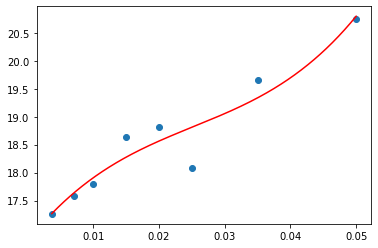

In [39]:
plt.scatter(data['p'][1:], data['V'][1:]) #il [:8] indica che non considero l'ultimo elemento

#fit con funzione 
#w = scipy.optimize.curve_fit(curve_pasch_fit,  data['p'],  data['V'], bounds=(0, np.inf))
#z = np.linspace(data['p'].min(), data['p'].max(), 500)
#plt.plot(z, curve_pasch_fit(z, w[0]), 'r')

#fit quadratico
w = np.poly1d(np.polyfit(data['p'][1:], data['V'][1:], 3))
z = np.linspace(data['p'][1:].min(), data['p'][1:].max(), 500)
plt.plot(z, w(z), 'r')

#print(w)

## Sonde di Langmuir

dati csv

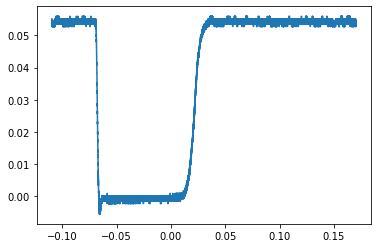

In [30]:
data = pd.read_csv('SDS00004.csv')

#seleziono i dati in cui l'andamento della tensione è esponenziale e lo verifico con un fit:
#It_data = data[(data['CH2'] > 0) & (data['Source'] > 0) & (data['Source'] < 0.06)] #csv-1

plt.plot(data['Source'], (data['CH2']/100))

[342.37479002 -10.89877674]


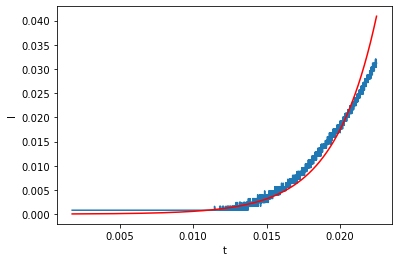

In [27]:
It_data = data[(data['CH2'] > 0) & (data['Source'] > 0) & (data['Source'] < 0.0225)] #csv-4
plt.plot(It_data['Source'], (It_data['CH2']/100))
plt.xlabel('t')
plt.ylabel('I')

w = np.polyfit((It_data['Source']), np.log(It_data['CH2']/100), 1)
print(w)

z = np.linspace(It_data['Source'].min(), It_data['Source'].max(), 500)
plt.plot(z, np.exp(w[1])*np.exp(z*w[0]), 'r')
#plt.savefig('coorente.jpg')

Text(0, 0.5, 'V')

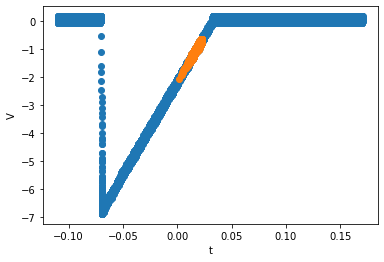

In [7]:
plt.scatter((data['Source']), (data['CH1']))
plt.scatter((It_data['Source']), (It_data['CH1']))
plt.xlabel('t')
plt.ylabel('V')

[5.01309089 0.12143542]


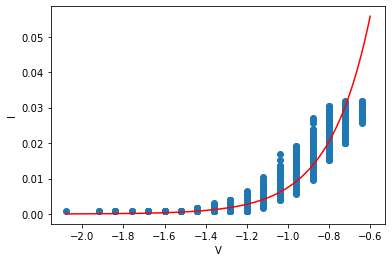

In [8]:
plt.scatter(It_data['CH1'], (It_data['CH2']/100))
plt.xlabel('V')
plt.ylabel('I')
#plt.xlim(-0.15,0.125)  csv-1

w = np.polyfit((It_data['CH1']), np.log(It_data['CH2']/100), 1)
print(w)

#z = np.linspace(It_data['CH1'].min(), 0.125, 500) csv-1
z = np.linspace(It_data['CH1'].min(), -0.6, 500) #csv-4
plt.plot(z, np.exp(w[1])*np.exp(z*w[0]), 'r')

In [31]:
#def i_lang(x, ):
 #   return x**2 + 3*x + 2

from scipy.optimize import curve_fit

It_data1 = data[(data['CH2'] != 0)
               
print(It_data1)

x = It_data1['Source'].to_numpy()
y = It_data1['CH2'].to_numpy()

# Fit the function a * np.exp(b * t) + c to x and y
curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, x, y/100)


SyntaxError: invalid syntax (<ipython-input-31-8d845e981300>, line 8)